## DATA SOURCE

[coorteeqsrafva.csv](https://www.kaggle.com/arjunascagnetto/ptbxl-atrial-fibrillation-detection)


[ecgeq-500hzsrfava.npy](https://www.kaggle.com/arjunascagnetto/ptbxl-atrial-fibrillation-detection)


In [1]:
#Import Essential liberies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random

In [2]:
df_patient_info = pd.read_csv(r'coorteeqsrafva.csv', sep= ';', index_col= 0)
df_patient_info.head()

,diagnosi,ecg_id,ritmi,patient_id,age,sex,height,weight,nurse,site,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,STACH,10900,VA,15654.0,54.0,0,NaN,NaN,0.0,0.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,6,records100/10000/10900_lr,records500/10000/10900_hr
1,AFLT,10900,AF,15654.0,54.0,0,NaN,NaN,0.0,0.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,6,records100/10000/10900_lr,records500/10000/10900_hr
2,SR,8209,SR,12281.0,55.0,0,NaN,NaN,1.0,2.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,10,records100/08000/08209_lr,records500/08000/08209_hr
3,STACH,17620,VA,2007.0,29.0,1,164.0,56.0,7.0,1.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,1,records100/17000/17620_lr,records500/17000/17620_hr
4,SBRAD,12967,VA,8685.0,57.0,0,NaN,NaN,0.0,0.0,...,False,NaN,", I-AVR,",NaN,NaN,NaN,NaN,1,records100/12000/12967_lr,records500/12000/12967_hr


In [3]:
df_patient_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6428 entries, 0 to 6427
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   diagnosi                      6428 non-null   object 
 1   ecg_id                        6428 non-null   int64  
 2   ritmi                         6428 non-null   object 
 3   patient_id                    6428 non-null   float64
 4   age                           6394 non-null   float64
 5   sex                           6428 non-null   int64  
 6   height                        1866 non-null   float64
 7   weight                        2428 non-null   float64
 8   nurse                         6097 non-null   float64
 9   site                          6423 non-null   float64
 10  device                        6428 non-null   object 
 11  recording_date                6428 non-null   object 
 12  report                        6428 non-null   object 
 13  scp

In [4]:
#drop unnecessary columns. Deciding to drop columns is based on experience and null values
columns= df_patient_info.columns
drop_columns = columns[[8, 9, 10, 12, 13, 15, 16, 17, 21, 22, 23, 25, 26, 27, 28, 29]] 
print(f"These are the columns to drop: \n {list(drop_columns)}")
df_patient_info.drop(drop_columns, axis= 1, inplace= True)

These are the columns to drop: 
 ['nurse', 'site', 'device', 'report', 'scp_codes', 'infarction_stadium1', 'infarction_stadium2', 'validated_by', 'baseline_drift', 'static_noise', 'burst_noise', 'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr']


In [5]:
df_patient_info.head()

,diagnosi,ecg_id,ritmi,patient_id,age,sex,height,weight,recording_date,heart_axis,second_opinion,initial_autogenerated_report,validated_by_human,electrodes_problems
0,STACH,10900,VA,15654.0,54.0,0,NaN,NaN,1993-09-01 11:31:17,MID,False,True,False,NaN
1,AFLT,10900,AF,15654.0,54.0,0,NaN,NaN,1993-09-01 11:31:17,MID,False,True,False,NaN
2,SR,8209,SR,12281.0,55.0,0,NaN,NaN,1992-06-09 15:52:36,LAD,False,False,True,NaN
3,STACH,17620,VA,2007.0,29.0,1,164.0,56.0,1997-02-08 18:33:30,NaN,False,False,True,NaN
4,SBRAD,12967,VA,8685.0,57.0,0,NaN,NaN,1994-09-13 10:21:14,MID,False,True,False,NaN


In [6]:
df_patient_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6428 entries, 0 to 6427
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   diagnosi                      6428 non-null   object 
 1   ecg_id                        6428 non-null   int64  
 2   ritmi                         6428 non-null   object 
 3   patient_id                    6428 non-null   float64
 4   age                           6394 non-null   float64
 5   sex                           6428 non-null   int64  
 6   height                        1866 non-null   float64
 7   weight                        2428 non-null   float64
 8   recording_date                6428 non-null   object 
 9   heart_axis                    4124 non-null   object 
 10  second_opinion                6428 non-null   bool   
 11  initial_autogenerated_report  6428 non-null   bool   
 12  validated_by_human            6428 non-null   bool   
 13  ele

In [7]:
#Update the electrode problem feature to Yes or NO 
df_patient_info.electrodes_problems = df_patient_info.electrodes_problems.where(df_patient_info.electrodes_problems.isna(), other= 'yes')
df_patient_info.electrodes_problems = df_patient_info.electrodes_problems.fillna('no')

In [8]:
df_patient_info.describe()

,ecg_id,patient_id,age,sex,height,weight
count,6428.000000,6428.000000,6394.000000,6428.000000,1866.000000,2428.000000
mean,11394.336341,11597.602520,61.740069,0.478376,166.796356,69.841845
std,6239.520460,6248.076594,17.739252,0.499571,10.249504,16.795521
min,2.000000,304.000000,4.000000,0.000000,95.000000,5.000000
25%,6112.250000,6489.250000,52.000000,0.000000,160.000000,58.000000
50%,11550.500000,11976.000000,64.000000,0.000000,167.000000,69.000000
75%,16785.500000,16958.000000,75.000000,1.000000,174.000000,79.000000
max,21833.000000,21792.000000,95.000000,1.000000,195.000000,210.000000


Plot a summary of age, height and weight. Use histogram and boxplot to get a sense of the distribution and determine how to fill na values

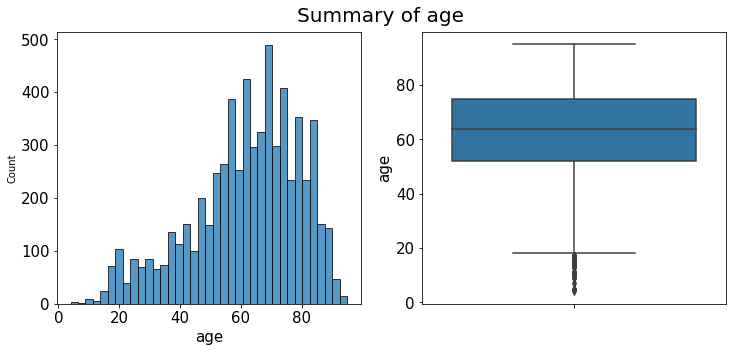

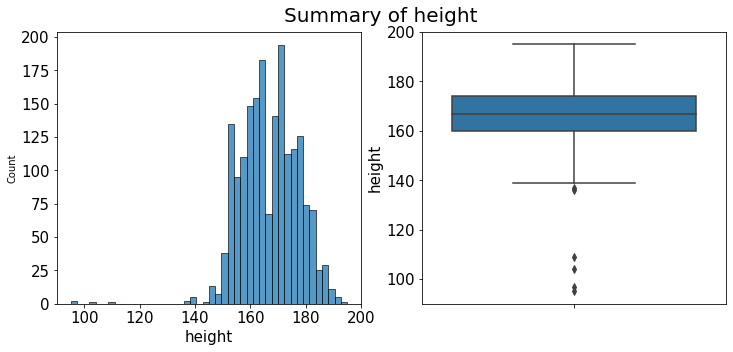

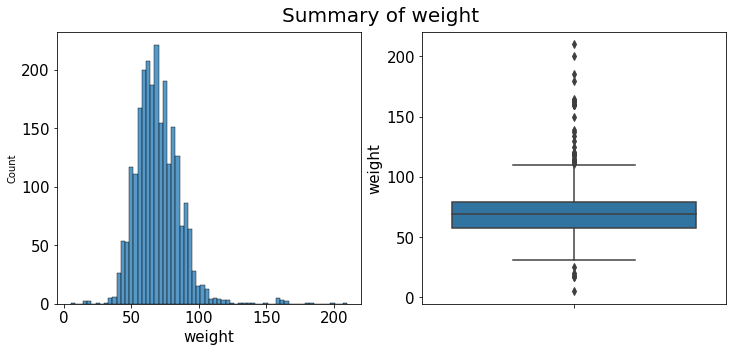

In [9]:
features= ['age', 'height', 'weight']
label_size= 15

for feature in features:

    fig, (ax1, ax2) = plt.subplots(figsize= (12, 5), ncols= 2, nrows= 1)
    _= sns.histplot(x= feature, ax= ax1, data= df_patient_info)
    _= sns.boxplot(y= feature, data= df_patient_info, ax= ax2)

    ax1.set_xlabel(feature, fontsize = label_size)
    ax1.tick_params(axis= 'both', labelsize= label_size)


    ax2.set_ylabel(feature, fontsize = label_size)
    ax2.tick_params(axis= 'both', labelsize= label_size)

    _=fig.suptitle(f'Summary of {feature}', fontsize= 20, y= 0.95)


The plots shows a few outliesrs but there is some symmetry around the mean for the height and weight.
For this reasons replace nan with median for age and mean for both height and weight.

In [10]:
df_patient_info['age'] = df_patient_info['age'].fillna(df_patient_info['age'].median())
df_patient_info[['height', 'weight']] = df_patient_info[['height', 'weight']].fillna(df_patient_info[['height', 'weight']].mean())

In [11]:
df_patient_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6428 entries, 0 to 6427
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   diagnosi                      6428 non-null   object 
 1   ecg_id                        6428 non-null   int64  
 2   ritmi                         6428 non-null   object 
 3   patient_id                    6428 non-null   float64
 4   age                           6428 non-null   float64
 5   sex                           6428 non-null   int64  
 6   height                        6428 non-null   float64
 7   weight                        6428 non-null   float64
 8   recording_date                6428 non-null   object 
 9   heart_axis                    4124 non-null   object 
 10  second_opinion                6428 non-null   bool   
 11  initial_autogenerated_report  6428 non-null   bool   
 12  validated_by_human            6428 non-null   bool   
 13  ele

In [12]:
df_patient_info.describe()

,ecg_id,patient_id,age,sex,height,weight
count,6428.000000,6428.000000,6428.000000,6428.000000,6428.000000,6428.000000
mean,11394.336341,11597.602520,61.752022,0.478376,166.796356,69.841845
std,6239.520460,6248.076594,17.693027,0.499571,5.521259,10.321058
min,2.000000,304.000000,4.000000,0.000000,95.000000,5.000000
25%,6112.250000,6489.250000,52.000000,0.000000,166.796356,69.841845
50%,11550.500000,11976.000000,64.000000,0.000000,166.796356,69.841845
75%,16785.500000,16958.000000,75.000000,1.000000,166.796356,69.841845
max,21833.000000,21792.000000,95.000000,1.000000,195.000000,210.000000


Bin age, height and weight in groups/category

In [13]:
df_patient_info['Age_Group'] = pd.cut(df_patient_info.age, bins= [0, 55, 70, 100]).astype('str')
df_patient_info['Height_Group'] = pd.cut(df_patient_info.height, bins= [90, 166, 167, 200]).astype('str')
df_patient_info['Weight_Group'] = pd.cut(df_patient_info.weight, bins= [0, 40, 50, 60, 70, 80, 210]).astype('str')

In [14]:
df_patient_info.head()

,diagnosi,ecg_id,ritmi,patient_id,age,sex,height,weight,recording_date,heart_axis,second_opinion,initial_autogenerated_report,validated_by_human,electrodes_problems,Age_Group,Height_Group,Weight_Group
0,STACH,10900,VA,15654.0,54.0,0,166.796356,69.841845,1993-09-01 11:31:17,MID,False,True,False,no,"(0, 55]","(166, 167]","(60, 70]"
1,AFLT,10900,AF,15654.0,54.0,0,166.796356,69.841845,1993-09-01 11:31:17,MID,False,True,False,no,"(0, 55]","(166, 167]","(60, 70]"
2,SR,8209,SR,12281.0,55.0,0,166.796356,69.841845,1992-06-09 15:52:36,LAD,False,False,True,no,"(0, 55]","(166, 167]","(60, 70]"
3,STACH,17620,VA,2007.0,29.0,1,164.000000,56.000000,1997-02-08 18:33:30,NaN,False,False,True,no,"(0, 55]","(90, 166]","(50, 60]"
4,SBRAD,12967,VA,8685.0,57.0,0,166.796356,69.841845,1994-09-13 10:21:14,MID,False,True,False,no,"(55, 70]","(166, 167]","(60, 70]"


In [15]:
df_patient_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6428 entries, 0 to 6427
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   diagnosi                      6428 non-null   object 
 1   ecg_id                        6428 non-null   int64  
 2   ritmi                         6428 non-null   object 
 3   patient_id                    6428 non-null   float64
 4   age                           6428 non-null   float64
 5   sex                           6428 non-null   int64  
 6   height                        6428 non-null   float64
 7   weight                        6428 non-null   float64
 8   recording_date                6428 non-null   object 
 9   heart_axis                    4124 non-null   object 
 10  second_opinion                6428 non-null   bool   
 11  initial_autogenerated_report  6428 non-null   bool   
 12  validated_by_human            6428 non-null   bool   
 13  ele

In [16]:
#Save clean file to csv for later use
df_patient_info.to_csv('clean_patient_info.csv', index= 'index')

No work on the ecg files

In [17]:
#Load numpy array
ecg_arrays = np.load('ecgeq-500hzsrfava.npy')

In [18]:
ecg_arrays.shape

(6428, 5000, 12)

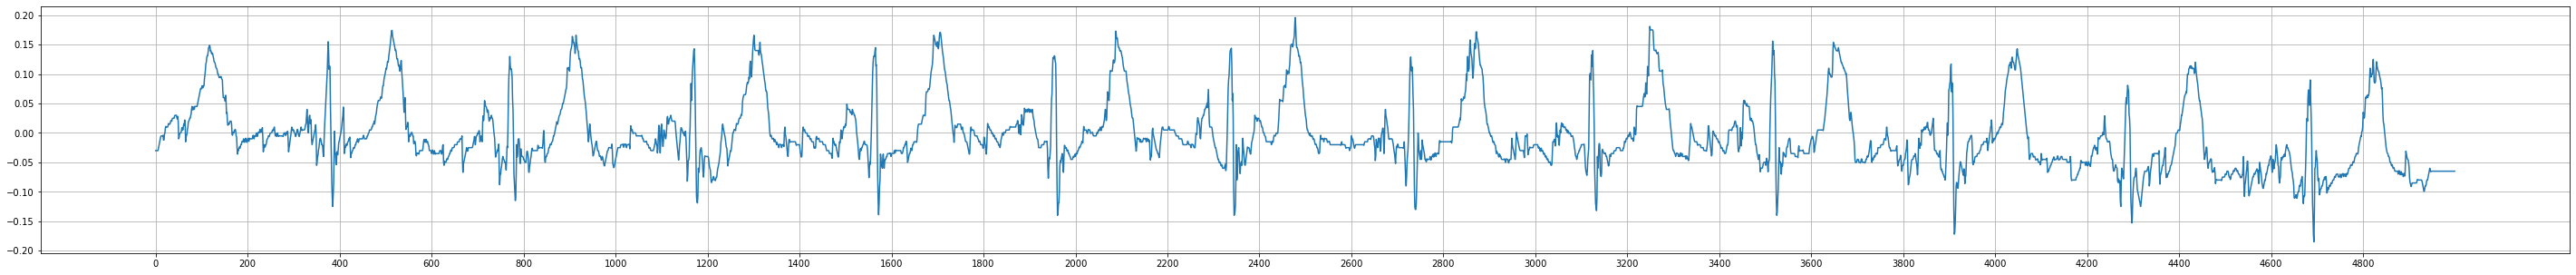

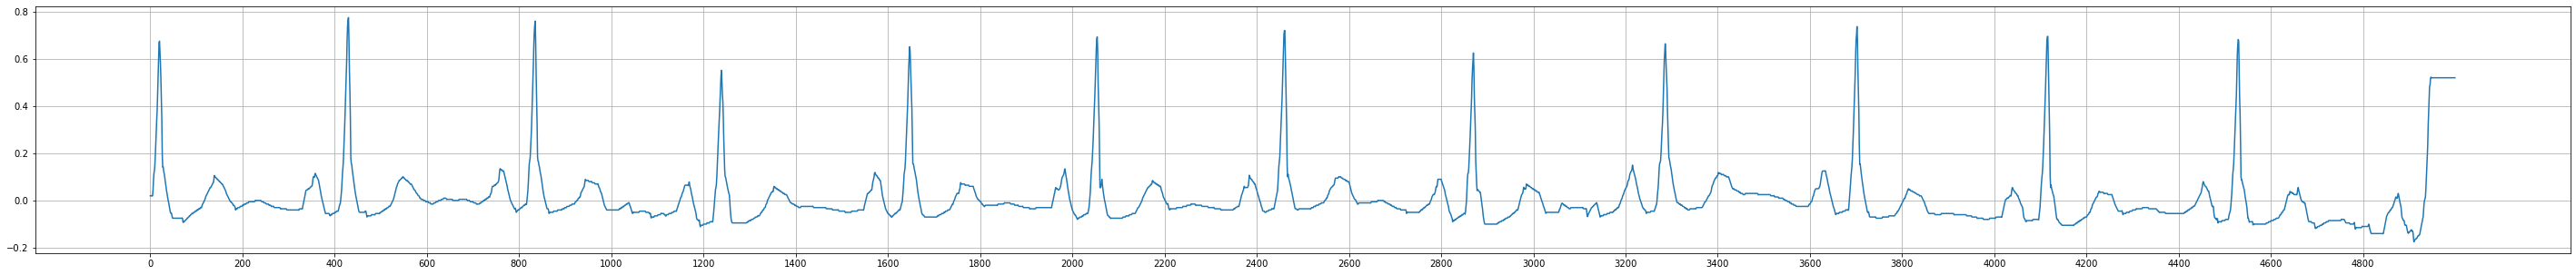

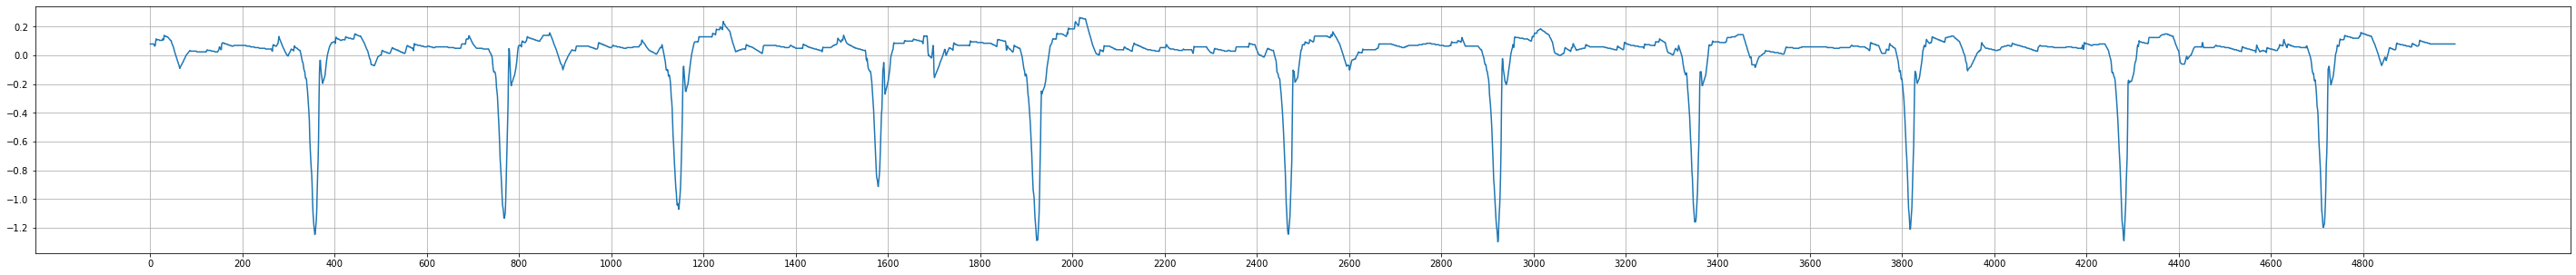

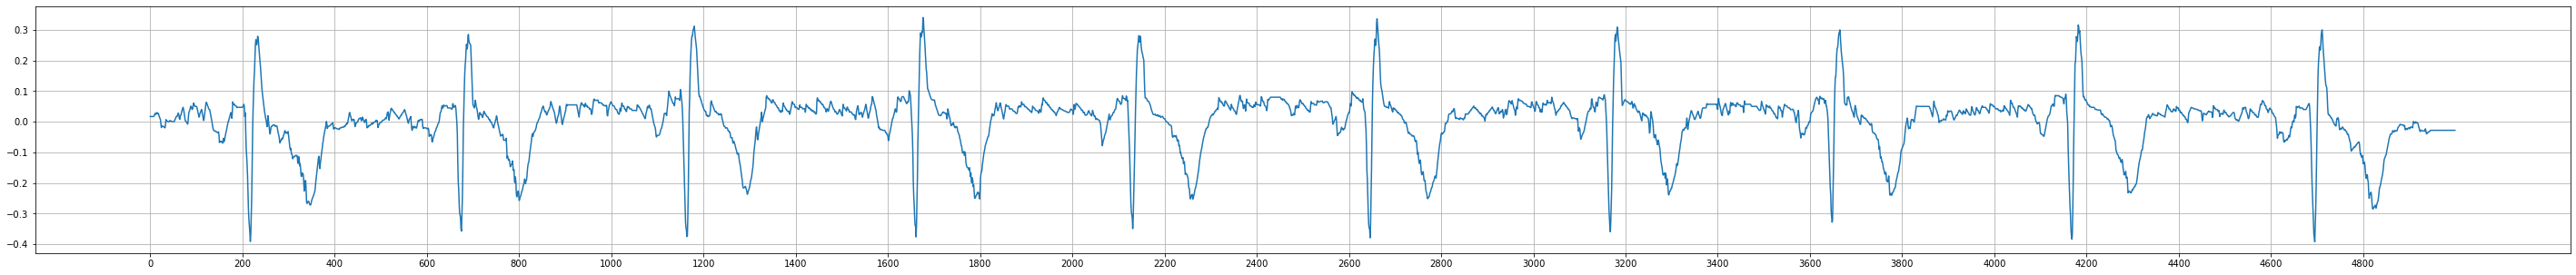

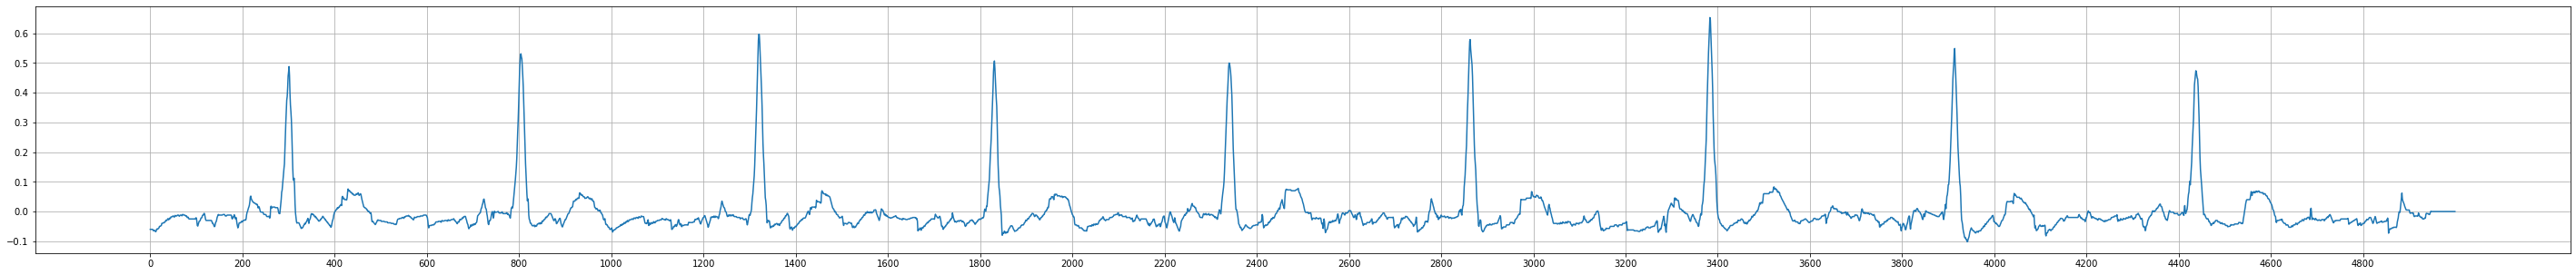

In [19]:
normal_patient_index= random.sample(list(df_patient_info[df_patient_info.ritmi == 'SR'].index), 5)
for i, patient in enumerate(normal_patient_index):
    plt.figure(figsize= (50, 5))
    plt.plot(ecg_arrays[patient, :, i])
    plt.xticks(np.arange(0, 5000, 200))
    plt.grid(True)

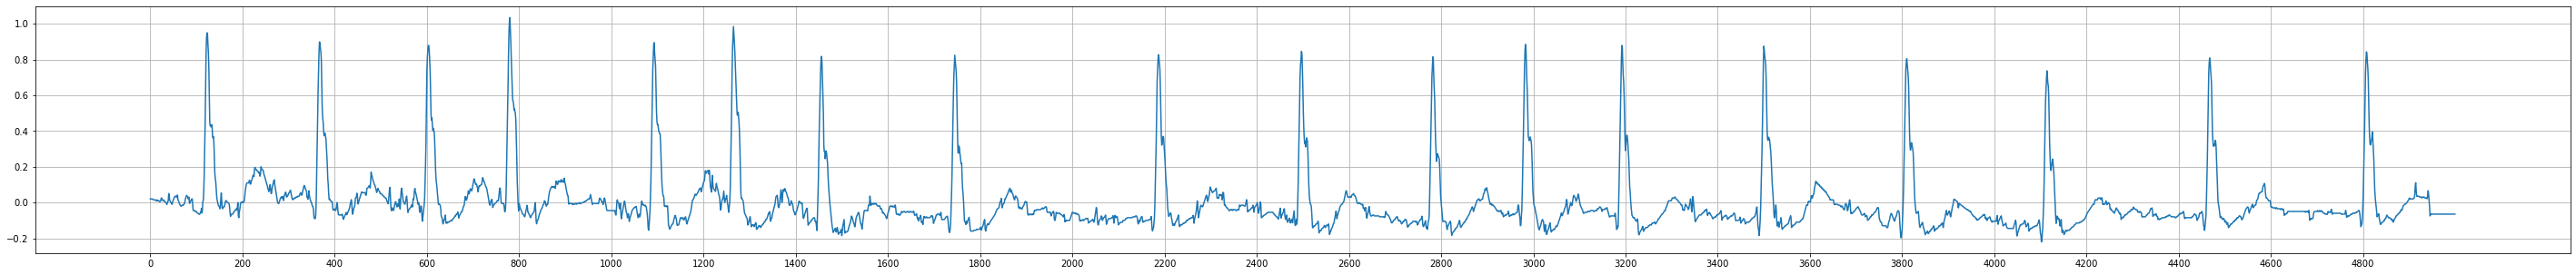

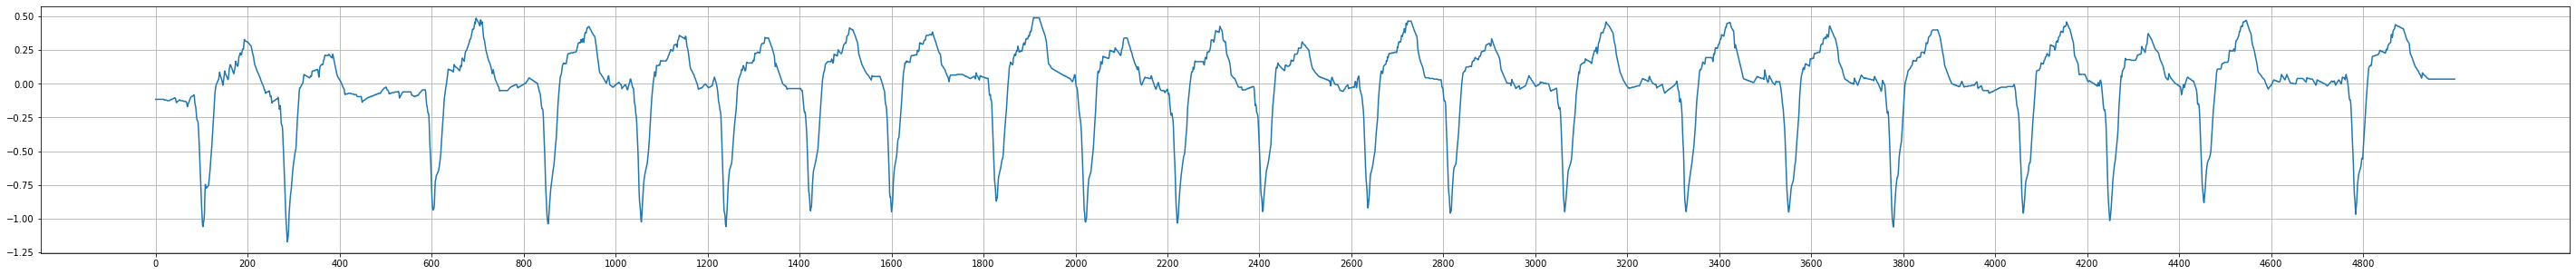

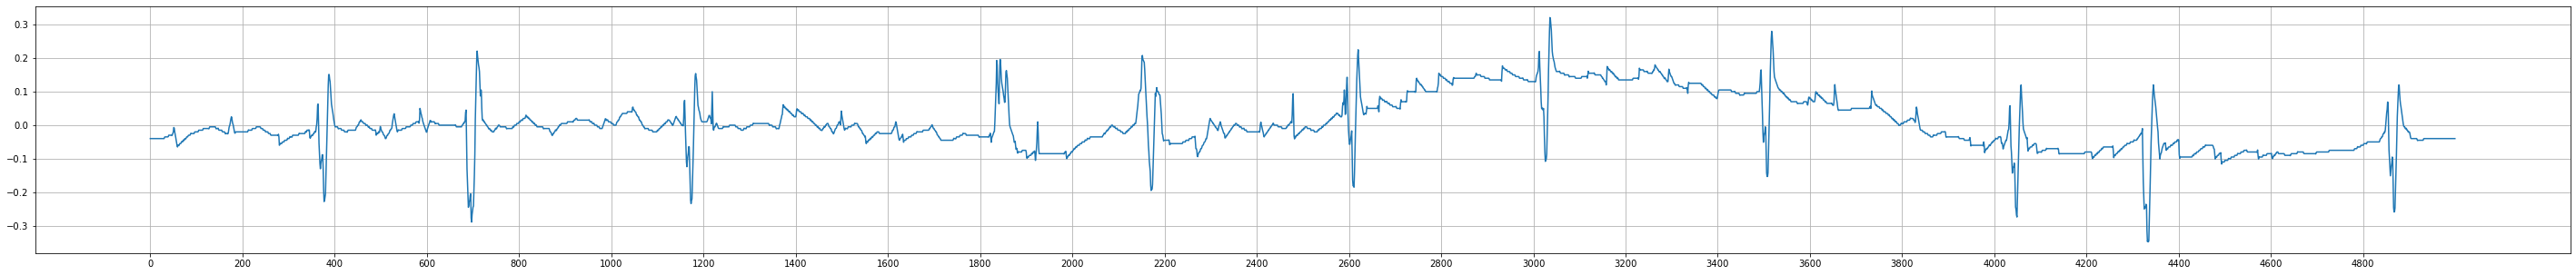

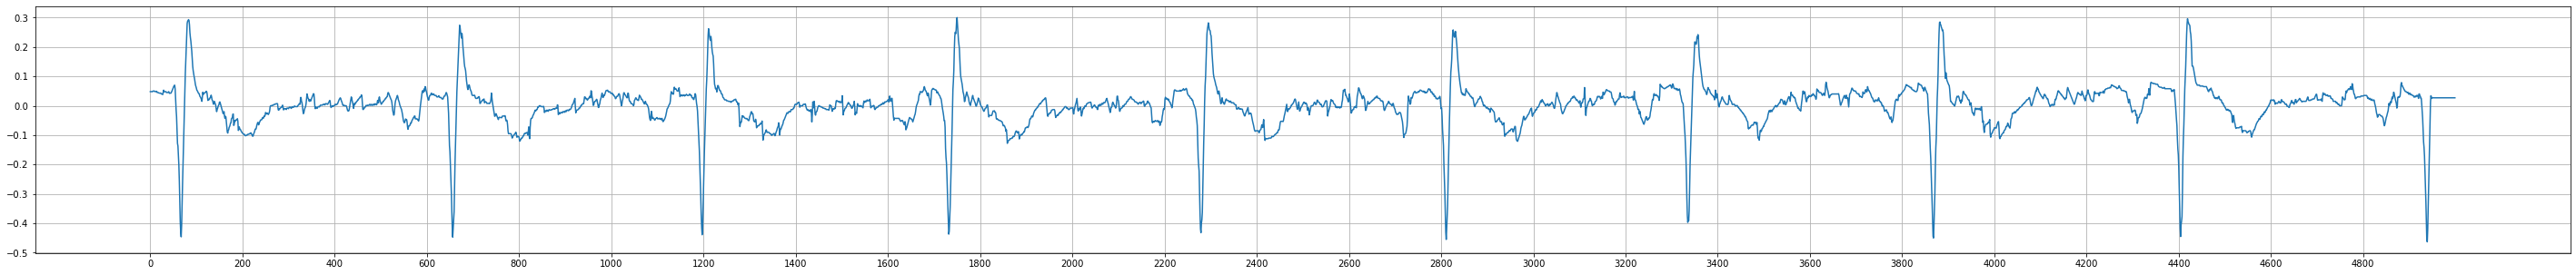

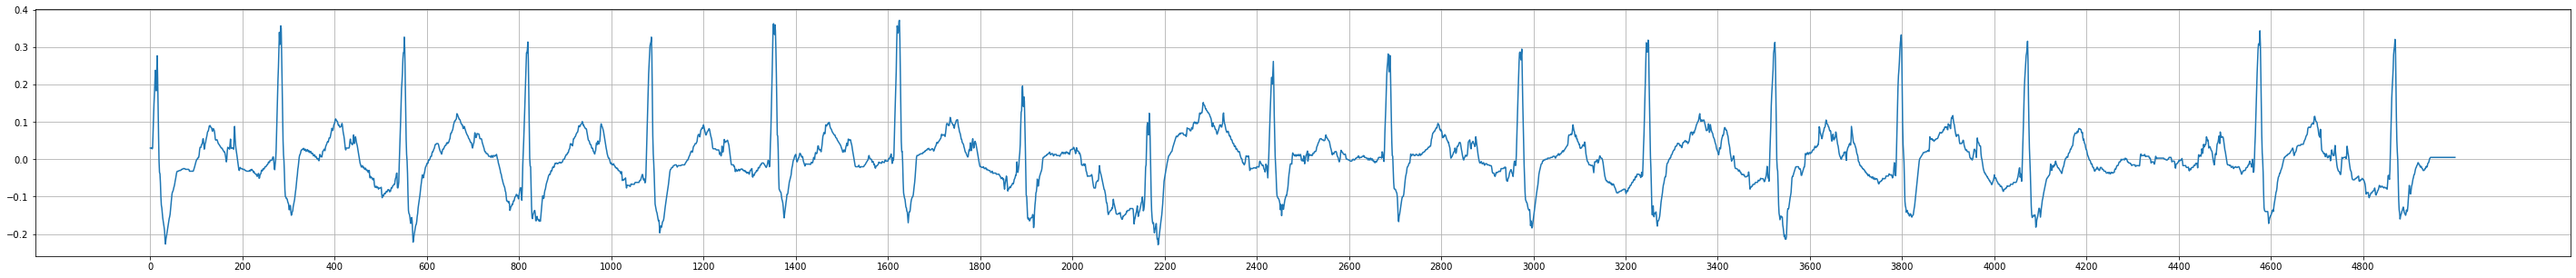

In [20]:
Afib_patient_index= random.sample(list(df_patient_info[df_patient_info.ritmi == 'AF'].index), 5)
for i, patient in enumerate(Afib_patient_index):
    plt.figure(figsize= (50, 5))
    plt.plot(ecg_arrays[patient, :, i])
    plt.xticks(np.arange(0, 5000, 200))
    plt.grid(True)

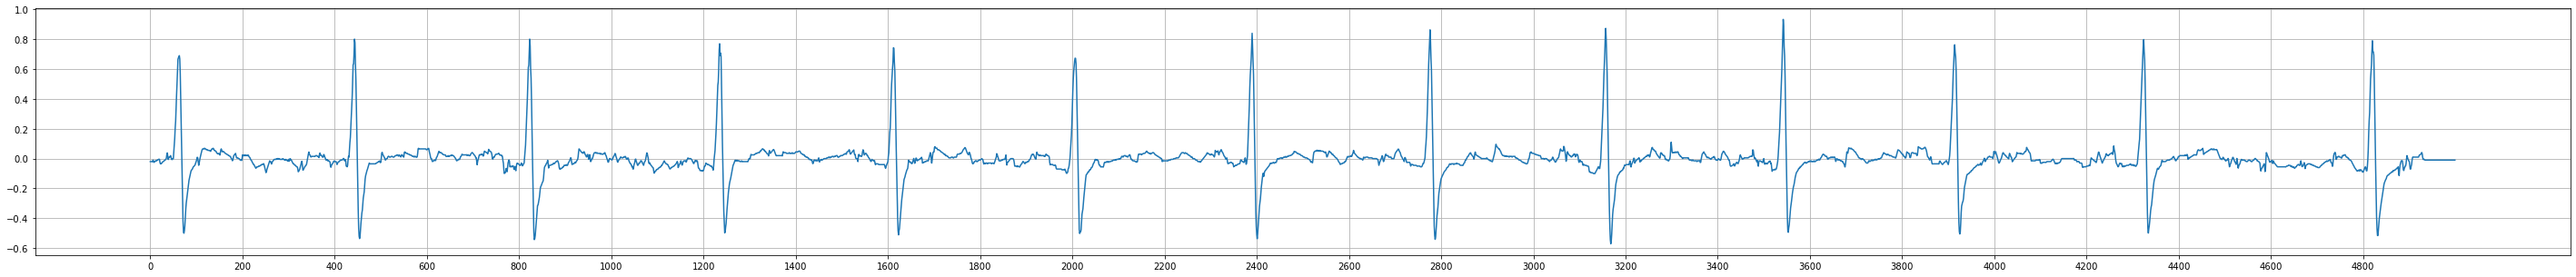

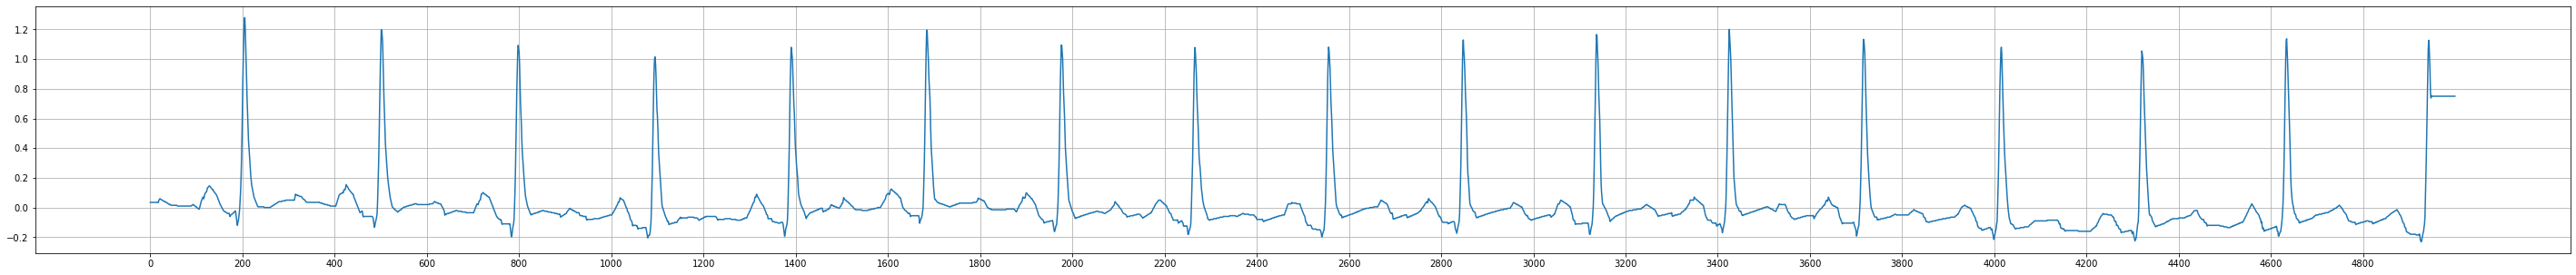

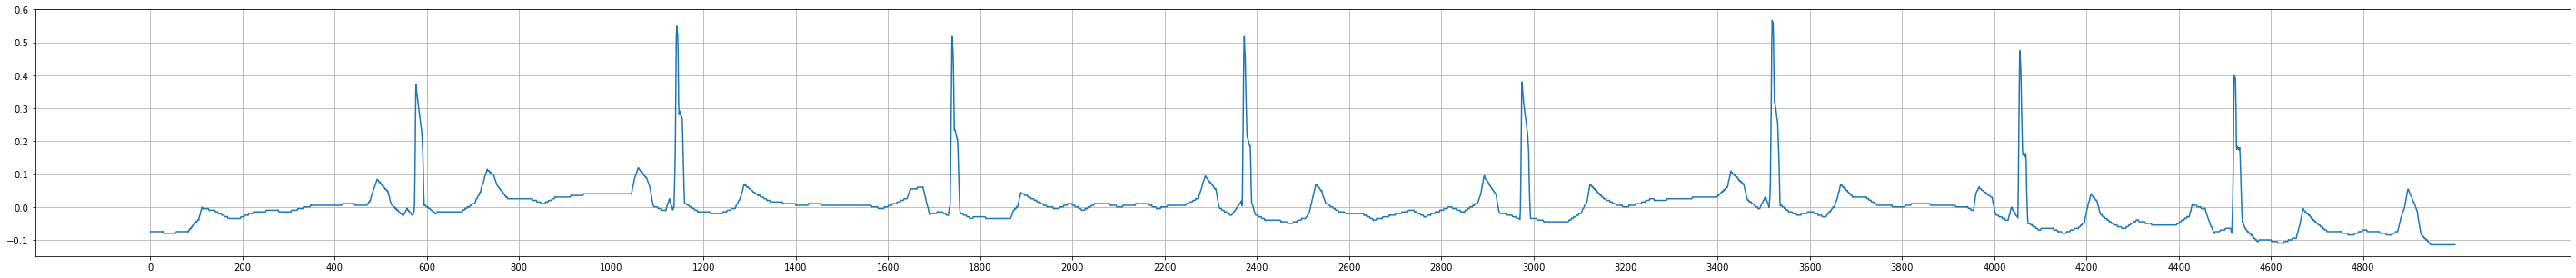

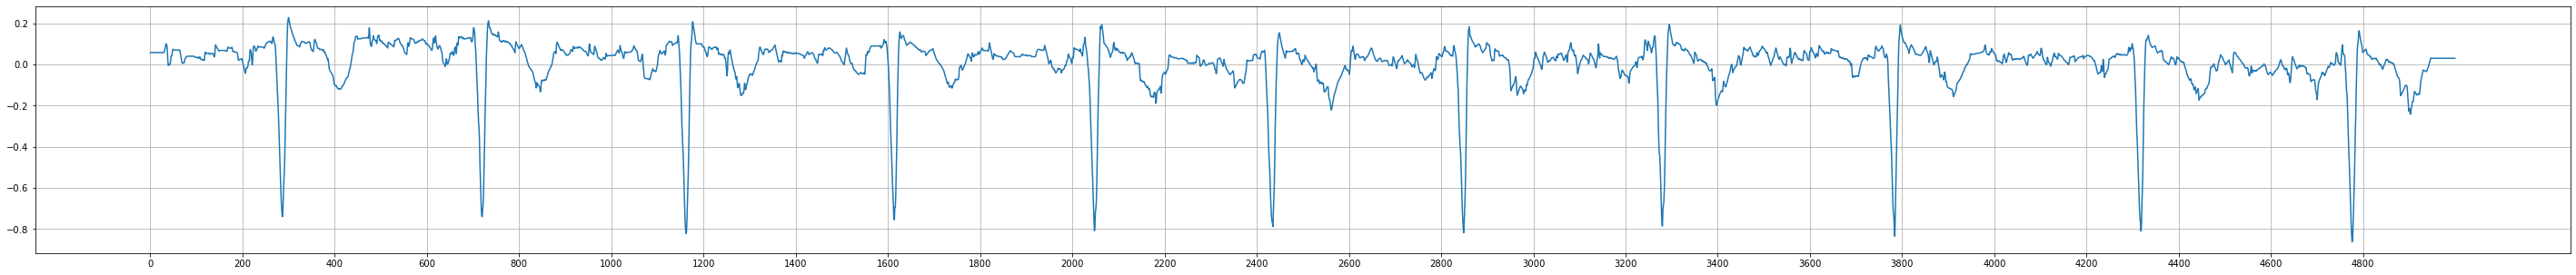

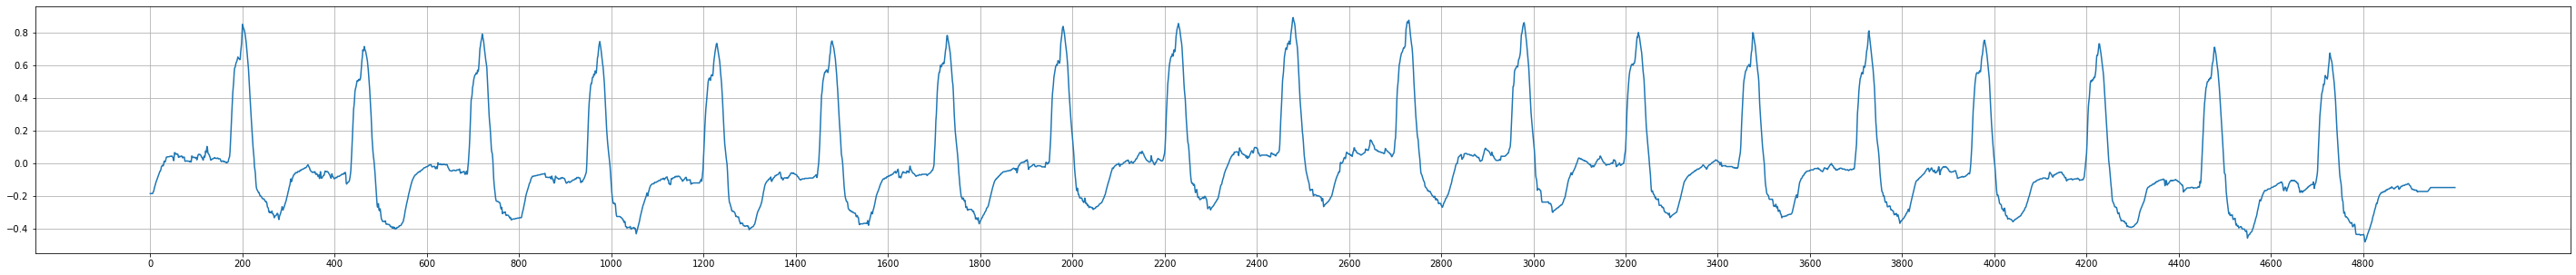

In [21]:
OtherRyhmia_patient_index= random.sample(list(df_patient_info[df_patient_info.ritmi == 'VA'].index), 5)
for i, patient in enumerate(OtherRyhmia_patient_index):
    plt.figure(figsize= (50, 5))
    plt.plot(ecg_arrays[patient, :, i])
    plt.xticks(np.arange(0, 5000, 200))
    plt.grid(True)

The plots show repeation along the X. Therefore, take subset of the data. Take first 800 points

In [22]:
new_ecg_arrays = ecg_arrays[:, :800, :]
patient_index, time, lead = new_ecg_arrays.shape
reshape_new_ecg_arrays = new_ecg_arrays.reshape(-1, time * lead, order= 'F')

reshape_new_ecg_arrays.shape


(6428, 9600)

In [23]:

df_ecg = pd.DataFrame(reshape_new_ecg_arrays)

In [24]:
df_ecg.head()

,0,1,2,3,4,5,6,7,8,9,...,9590,9591,9592,9593,9594,9595,9596,9597,9598,9599
0,-0.005,-0.005,-0.005,-0.005,-0.005,-0.005,-0.005,-0.005,-0.005,-0.005,...,-0.095,-0.092,-0.086,-0.102,-0.113,-0.10,-0.128,-0.142,-0.139,-0.141
1,-0.005,-0.005,-0.005,-0.005,-0.005,-0.005,-0.005,-0.005,-0.005,-0.005,...,-0.095,-0.092,-0.086,-0.102,-0.113,-0.10,-0.128,-0.142,-0.139,-0.141
2,-0.170,-0.170,-0.170,-0.170,-0.170,-0.170,-0.170,-0.170,-0.170,-0.170,...,0.025,0.029,0.030,0.030,0.030,0.03,0.026,0.024,0.026,0.024
3,0.000,0.000,0.000,0.000,0.000,0.000,0.008,0.013,0.034,0.059,...,-0.105,-0.089,-0.116,-0.142,-0.139,-0.14,-0.144,-0.145,-0.147,-0.150
4,0.015,0.015,0.015,0.015,0.015,0.015,0.020,0.017,0.017,0.020,...,-0.130,-0.130,-0.130,-0.130,-0.130,-0.13,-0.130,-0.130,-0.130,-0.130


In [25]:
df_ecg.to_csv('ecg_data.csv', index= 'index')